In [3]:
import pandas as pd
import numpy as np
import os
import sys
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

point = Point(0.5, 0.5)
polygon = Polygon([(0, 0), (0, 1), (1, 1), (1, 0)])
print(polygon.contains(point))

True


In [4]:
df = pd.read_csv("geographic.csv")

In [26]:
df_uber_2014 = pd.read_csv("uber_trips_2014.csv")

In [45]:
df_uber_2014.head()

,pickup_datetime,pickup_latitude,pickup_longitude,base
0,4/1/14 0:11,40.7690,-73.9549,B02512
1,4/1/14 0:17,40.7267,-74.0345,B02512
2,4/1/14 0:21,40.7316,-73.9873,B02512
3,4/1/14 0:28,40.7588,-73.9776,B02512
4,4/1/14 0:33,40.7594,-73.9722,B02512


In [5]:
df.head()

,BK88,QN52,QN48,QN51,QN27,BX35,BX98,QN07,MN06,QN02,...,MN25,MN24,MN23,MN13,MN15,MN32,MN33,MN99,QN18,QN29
0,-73.976051,-73.794934,-73.775740,-73.803792,-73.861099,-73.896967,-73.872873,-73.757258,-73.946080,-73.760316,...,-74.000784,-73.992605,-73.989904,-74.001535,-73.993833,-73.938048,-73.935054,-74.010930,-73.858726,-73.867911
1,40.631284,40.757806,40.743334,40.775618,40.763673,40.834350,40.785983,40.718147,40.821271,40.675118,...,40.694295,40.724145,40.734443,40.762653,40.772940,40.780838,40.791695,40.684500,40.735717,40.744942
2,-73.977167,-73.794749,-73.775799,-73.800991,-73.859931,-73.896787,-73.872886,-73.755890,-73.946404,-73.758806,...,-74.000960,-73.992634,-73.989870,-74.001339,-73.993789,-73.937903,-73.935108,-74.011934,-73.858672,-73.867877
3,40.630755,40.755636,40.743326,40.775397,40.762209,40.834133,40.785971,40.716307,40.820580,40.673014,...,40.694077,40.724065,40.733535,40.762217,40.772912,40.780758,40.791658,40.683896,40.735627,40.744824
4,-73.977000,-73.794579,-73.778060,-73.798653,-73.859668,-73.896303,-73.872983,-73.754702,-73.946720,-73.758598,...,-74.003015,-73.993093,-73.990028,-74.001279,-73.993727,-73.937796,-73.935173,-74.012177,-73.858585,-73.867852


In [81]:
df_demo = pd.read_csv("demographics.csv")

In [82]:
df_demo.head()

,nta_name,borough,nta_code,population,under_5_years,5-9_years,10-14_years,15-19_years,20-24_years,25-29_years,...,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more,median_income,mean_income
0,Allerton-Pelham Gardens,Bronx,BX31,28903,1679,1706,1763,2039,1964,1703,...,797,773,1160,1764,1155,1562,765,427,61638,78489
1,Annadale-Huguenot-Prince's Bay-Eltingville,Staten Island,SI01,27770,1397,1698,1817,1880,1720,1594,...,571,405,1008,1523,1346,2075,1086,1151,88288,109187
2,Arden Heights,Staten Island,SI48,25238,1507,1540,1596,1752,1614,1561,...,337,516,707,1421,1611,2021,1047,740,89570,101627
3,Astoria,Queens,QN70,78793,3480,3037,3060,3392,6630,11586,...,3673,2816,4725,6463,4557,4698,1627,1197,54882,70094
4,Auburndale,Queens,QN48,19996,917,966,1063,1168,1214,1307,...,445,632,690,1417,1060,1237,589,433,70772,84402


# Make nta poly data

In [109]:
def get_nta_name(nta_code):
    if nta_code in nta_code_to_name_map:
        return nta_code_to_name_map[nta_code]
    else:
        return np.nan

def get_nta_borough(nta_code):
    if nta_code in nta_code_to_borough_map:
        return nta_code_to_borough_map[nta_code]
    else:
        return np.nan

In [107]:
print "BX98" in nta_code_to_name_map.keys()
print nta_code_to_borough_map.keys()

False
['BX08', 'BK64', 'BK63', 'BK61', 'BK60', 'BX03', 'BX01', 'BX06', 'BX07', 'BK69', 'BK68', 'SI48', 'BX09', 'QN18', 'MN40', 'MN20', 'BX33', 'SI45', 'SI07', 'BX59', 'QN53', 'QN38', 'QN30', 'QN31', 'QN33', 'QN34', 'QN35', 'QN37', 'BK50', 'BK58', 'BX05', 'SI54', 'SI05', 'MN34', 'MN35', 'MN36', 'MN31', 'MN32', 'MN33', 'QN29', 'QN28', 'MN19', 'QN23', 'QN22', 'QN21', 'QN20', 'QN27', 'QN26', 'QN25', 'BX49', 'BK45', 'BK44', 'BK46', 'BK41', 'BK40', 'BK43', 'BK42', 'QN17', 'QN15', 'QN12', 'BK72', 'QN10', 'MN28', 'MN27', 'MN09', 'MN25', 'MN24', 'MN23', 'MN22', 'MN21', 'QN19', 'BX14', 'BX17', 'BX10', 'BX13', 'BK38', 'BK30', 'BK31', 'BK32', 'BK33', 'BK34', 'BK35', 'BK37', 'QN01', 'QN03', 'QN02', 'QN05', 'QN07', 'QN06', 'MN12', 'MN13', 'MN11', 'MN17', 'MN14', 'MN15', 'BX62', 'BX63', 'QN68', 'BK29', 'BK28', 'BK23', 'BK21', 'BK27', 'BK26', 'BK25', 'MN04', 'MN06', 'MN01', 'SI01', 'MN03', 'SI08', 'QN76', 'QN70', 'QN71', 'BX75', 'QN72', 'QN08', 'SI14', 'SI12', 'SI11', 'QN66', 'QN63', 'QN62', 'QN61', '

In [99]:
nta_code_to_name_map = {}
nta_code_to_borough_map = {}
for i in range(len(df_demo)):
    code = df_demo["nta_code"].iloc[i]
    name = df_demo["nta_name"].iloc[i]
    borough = df_demo["borough"].iloc[i]
    nta_code_to_name_map[code] = name
    nta_code_to_borough_map[code] = borough
    

In [97]:
c = all_ntas[0].polygon.exterior.coords.xy
c[1][0]

40.6312841471042

In [110]:
name_data = []
code_data = []
borough_data = []
point_order = []
polygon_id = []
lat_data = []
lon_data = []

for nta in all_ntas:
    poly = nta.polygon
    c = poly.exterior.coords.xy
    lats = c[1]
    lons = c[0]
    code = nta.name
    name = get_nta_name(code)
    borough = get_nta_borough(code)
    
    for i in range(len(lats)):
        name_data.append(name)
        code_data.append(code)
        borough_data.append(borough)
        point_order.append(i)
        polygon_id.append(code)
        lat_data.append(lats[i])
        lon_data.append(lons[i])
        
        
        

In [114]:
poly_data = {
    "NTA Name": name_data,
    "NTA Code": code_data,
    "Borough": borough_data,
    "Point Order":point_order,
    "Polygon ID": polygon_id,
    "Latitude":lat_data,
    "Longitude":lon_data
}

In [116]:
poly_df = pd.DataFrame.from_dict(poly_data)

In [117]:
poly_df.head()

,Borough,Latitude,Longitude,NTA Code,NTA Name,Point Order,Polygon ID
0,Brooklyn,40.631284,-73.976051,BK88,Borough Park,0,BK88
1,Brooklyn,40.630755,-73.977167,BK88,Borough Park,1,BK88
2,Brooklyn,40.629880,-73.977000,BK88,Borough Park,2,BK88
3,Brooklyn,40.629097,-73.976851,BK88,Borough Park,3,BK88
4,Brooklyn,40.628363,-73.976697,BK88,Borough Park,4,BK88


In [118]:
poly_df.to_csv("NTA_polygon_data.csv")

In [8]:
nta_codes = df.columns

In [10]:
nta_codes[0]

'BK88'

In [21]:
x = np.array(df["BK88"])

In [22]:
x = x[~np.isnan(x)]

In [24]:
def get_tuples(l, n=2):
    """Yield successive n-sized chunks from l."""
    return [l[i:i + n] for i in range(0, len(l), n)]

In [25]:
get_tuples(x)

[array([-73.97605079,  40.63128415]),
 array([-73.97716655,  40.6307549 ]),
 array([-73.97699992,  40.62987974]),
 array([-73.97685108,  40.62909682]),
 array([-73.97669748,  40.62836281]),
 array([-73.97657919,  40.62758143]),
 array([-73.97651605,  40.62730273]),
 array([-73.97645114,  40.6270165 ]),
 array([-73.97623597,  40.62598459]),
 array([-73.97726293,  40.62586101]),
 array([-73.97719809,  40.62511022]),
 array([-73.97711103,  40.6249565 ]),
 array([-73.97694526,  40.62406099]),
 array([-73.97683609,  40.62348928]),
 array([-73.97675353,  40.62302155]),
 array([-73.97656727,  40.62200314]),
 array([-73.97695214,  40.62163825]),
 array([-73.97705496,  40.62154076]),
 array([-73.97539524,  40.62077823]),
 array([-73.97682577,  40.61868404]),
 array([-73.97752445,  40.61768478]),
 array([-73.97785153,  40.61729585]),
 array([-73.97563097,  40.61595363]),
 array([-73.97537479,  40.61576296]),
 array([-73.9754442 ,  40.61612233]),
 array([-73.9754824 ,  40.61632016]),
 array([-73.

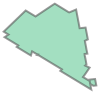

In [27]:
Polygon(get_tuples(x))

In [34]:
class NTA:
    def __init__(self, polygon, name):
        self.polygon = polygon
        self.name = name

In [36]:
all_ntas = []
for nta_name in df.columns:
    coords = np.array(df[nta_name])
    coords = coords[~np.isnan(coords)]
    poly = Polygon(get_tuples(coords))
    nta = NTA(poly, nta_name)
    all_ntas.append(nta)

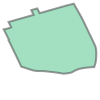

In [41]:
all_ntas[20].polygon

In [74]:
# lon should be around -73
# lat should be around 40
def get_nta_from_gps(lon, lat):
    point = Point(lon, lat)
    for my_nta in all_ntas:
        if my_nta.polygon.contains(point):
            return my_nta.name
        

In [77]:
print get_nta_from_gps(-73.97497408, 40.61403813)

BK46


In [121]:
nta_code_data = []
for i in range(len(df_uber_2014)):
    lt = df_uber_2014["pickup_latitude"].iloc[i]
    ln = df_uber_2014["pickup_longitude"].iloc[i]
    if get_nta_from_gps(ln,lt) != None:
        code = get_nta_from_gps(ln,lt)
        nta_code_data.append(code)
    else:
        nta_code_data.append(np.nan)
    #print get_nta_from_gps(ln,lt)

KeyboardInterrupt: 

In [68]:
df_uber_2014["NTA Code"] = nta_code_data

None


In [123]:
green_df = pd.read_csv("green_trips.csv")

In [205]:
def date_to_month(date_str):
    year = int(date_str.split()[0][:4])
    month = int(date_str.split()[0][5:7])
    month_index = ((year-2014)*12)+month
    return month_index

# def date_to_month(date_str):
#     month = int(date_str.split()[0][0])
#     year = int(date_str.split()[0][-2:])
#     month_index = ((year-14)*12)+month
#     return month_index

In [125]:
green_df.head(100)

,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,total_amount
0,2015-02-01 01:26:45,2015-02-01 01:49:58,-73.953545,40.811172,-73.984764,40.728386,1,8.11,27.80
1,2015-01-02 20:06:28,2015-01-02 20:14:04,-73.946709,40.714321,-73.961571,40.711475,1,1.29,9.80
2,2014-09-27 17:55:38,2014-09-27 18:19:56,-73.957626,40.718094,-73.947304,40.777813,5,6.12,26.30
3,2014-04-27 02:27:04,2014-04-27 02:39:02,-73.949501,40.713997,-73.987785,40.718582,2,3.68,17.30
4,2014-05-26 18:32:19,2014-05-26 18:44:13,-73.944092,40.672195,-73.977325,40.664013,1,2.40,11.50
5,2015-03-04 21:36:48,2015-03-04 21:43:47,-73.954826,40.804962,-73.944008,40.812088,1,1.16,9.36
6,2015-01-21 09:27:41,2015-01-21 09:51:01,-73.862000,40.730438,-73.865089,40.656422,1,7.50,25.80
7,2015-03-07 18:51:58,2015-03-07 19:20:49,-73.971947,40.675697,-74.009293,40.635708,6,4.58,21.30
8,2015-01-11 16:55:04,2015-01-11 17:04:26,-73.949883,40.681896,-73.923279,40.684875,1,1.51,8.80
9,2014-05-30 05:53:15,2014-05-30 06:00:00,-73.952370,40.789875,-73.949173,40.781448,1,1.20,7.50


In [137]:
t = green_df["pickup_datetime"].iloc[0]

In [191]:
print date_to_month("1/1/15 7:00")

13


In [139]:
t.split()

['2015-02-01', '01:26:45']

In [148]:
green_nta_data = pd.read_csv("green_trips_and_nta.csv.zip")

In [153]:
yello_nta_data = pd.read_csv("yellow_and_nta.csv.zip")

In [151]:
green_nta_data.head()

,Unnamed: 0,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,total_amount,NTA Code,Data Index
0,0,2015-02-01 01:26:45,2015-02-01 01:49:58,-73.953545,40.811172,-73.984764,40.728386,1,8.11,27.8,MN09,14
1,1,2015-01-02 20:06:28,2015-01-02 20:14:04,-73.946709,40.714321,-73.961571,40.711475,1,1.29,9.8,BK90,13
2,2,2014-09-27 17:55:38,2014-09-27 18:19:56,-73.957626,40.718094,-73.947304,40.777813,5,6.12,26.3,BK73,9
3,3,2014-04-27 02:27:04,2014-04-27 02:39:02,-73.949501,40.713997,-73.987785,40.718582,2,3.68,17.3,BK73,4
4,4,2014-05-26 18:32:19,2014-05-26 18:44:13,-73.944092,40.672195,-73.977325,40.664013,1,2.40,11.5,BK61,5


In [158]:
green_nta_data["Date Index"] = green_nta_data["pickup_datetime"].apply(date_to_month)

In [159]:
yello_nta_data["Date Index"] = yello_nta_data["pickup_datetime"].apply(date_to_month)

In [163]:
green_aggs = green_nta_data.groupby(["Date Index","NTA Code"]).agg(["count"])

In [170]:
green_aggs.head()

Unnamed: 0 pickup_datetime dropoff_datetime  \
                         count           count            count   
Date Index NTA Code                                               
4          BK09           4147            4147             4147   
           BK17           1098            1098             1098   
           BK19             90              90               90   
           BK21            178             178              178   
           BK23             24              24               24   

                    pickup_longitude pickup_latitude dropoff_longitude  \
                               count           count             count   
Date Index NTA Code                                                      
4          BK09                 4147            4147              4147   
           BK17                 1098            1098              1098   
           BK19                   90              90                90   
           BK21                  178             178               178   
           BK23                   24              24                24   

                    dropoff_latitude passenger_count trip_distance  \
                               count           count         count   
Date Index NTA Code                                                  
4          BK09                 4147            4147          4147   
           BK17                 1098            1098          1098   
           BK19                   90              90            90   
           BK21                  178             178           178   
           BK23                   24              24            24   

                    total_amount Data Index  
                           count      count  
Date Index NTA Code                          
4          BK09             4147       4147  
           BK17             1098       1098  
           BK19               90         90  
           BK21              178        178  
           BK23               24         24

In [171]:
yellow_aggs = yello_nta_data.groupby(["Date Index","NTA Code"]).agg(["count"])

In [173]:
yellow_aggs.to_csv("yellow_rides_nta_counts_jack.csv")

In [174]:
green_aggs.to_csv("green_rides_nta_counts_jack.csv")

In [175]:
uber_2014_nta_data = pd.read_csv("uber_trips_2014_and_nta.csv")

In [180]:
uber_2014_nta_data["pickup_datetime"].iloc[100]

'4/1/14 7:00'

In [192]:
uber_2014_nta_data["Date Index"] = uber_2014_nta_data["pickup_datetime"].apply(date_to_month)

In [194]:
uber_2014_nta_data_aggs = uber_2014_nta_data.groupby(["Date Index","NTA Code"]).agg(["count"])

In [196]:
uber_2014_nta_data_aggs.to_csv("uber_2014_nta_data_counts_jack.csv")

In [211]:
uber_2015_nta_data = pd.read_table("uber_nta_2015.csv",sep=' ')

In [214]:
uber_2015_nta_data.head()

,pickup_location_id,pickup_datetime,dispatch_base,affiliate_base,nta_code
1,141,2015-05-17 09:47:00,B02617,B02617,MN31
2,65,2015-05-17 09:47:00,B02617,B02617,BK38
3,100,2015-05-17 09:47:00,B02617,B02617,MN13
4,80,2015-05-17 09:47:00,B02617,B02774,BK90
5,90,2015-05-17 09:47:00,B02617,B02617,MN13


In [215]:
uber_2015_nta_data["Date Index"] = uber_2015_nta_data["pickup_datetime"].apply(date_to_month)

In [210]:
type(uber_2015_nta_data["pickup_datetime"].iloc[0])

str

In [218]:
uber_2015_nta_data.head()

,pickup_location_id,pickup_datetime,dispatch_base,affiliate_base,nta_code,Date Index
1,141,2015-05-17 09:47:00,B02617,B02617,MN31,17
2,65,2015-05-17 09:47:00,B02617,B02617,BK38,17
3,100,2015-05-17 09:47:00,B02617,B02617,MN13,17
4,80,2015-05-17 09:47:00,B02617,B02774,BK90,17
5,90,2015-05-17 09:47:00,B02617,B02617,MN13,17


In [219]:
uber_2015_nta_data["NTA Code"] = uber_2015_nta_data["nta_code"]

In [220]:
uber_2015_nta_data_aggs = uber_2015_nta_data.groupby(["Date Index","nta_code"]).agg(["count"])

In [221]:
uber_2015_nta_data_aggs.to_csv("uber_2015_nta_counts_jack.csv")

In [222]:
uber_2015_nta_data_aggs.head()

pickup_location_id pickup_datetime dispatch_base  \
                                 count           count         count   
Date Index nta_code                                                    
13         BK09                  15295           15295         15295   
           BK17                   1295            1295          1295   
           BK19                    573             573           573   
           BK21                    446             446           446   
           BK25                   1841            1841          1841   

                    affiliate_base NTA Code  
                             count    count  
Date Index nta_code                          
13         BK09              14670    15295  
           BK17               1235     1295  
           BK19                545      573  
           BK21                426      446  
           BK25               1758     1841

In [ ]:
plt.hist(res)